# AIES Mini Project Topic: AI Agent Learns To Walk
# Group Members:
# Ameya Khire PB 05
# Sahil Ranawade PB 16
# Deven Chhajed PB 32
                    

# Installations

In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 12.9 MB/s eta 0:00:00


In [2]:
!pip install swig
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2373077 sha256=283990360a0ffa6ded92b5861f597ab960d94b86e5f0ab02a0bde4203fc90aa0
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [3]:
# Update the package lists for upgrades for packages that need upgrading,
# as well as new packages that have just come to the repositories.
!sudo apt-get update

# Install necessary dependencies for creating virtual displays, handling video,
# and graphical user interface toolkits for rendering environments.
!sudo apt-get install -y xvfb ffmpeg freeglut3-dev

# Install a specific version of the 'imageio' library (version 2.4.0)
# for handling images and videos in Python.
!pip install 'imageio==2.4.0'

# Install the 'matplotlib' library for creating visualizations and plots in Python.
!pip install matplotlib

# Install 'pyvirtualdisplay' for managing and creating virtual displays
# required for rendering environments in headless systems.
!pip install pyvirtualdisplay

# Install 'tf-agents' with the 'reverb' extension for working with reinforcement learning agents.
!pip install tf-agents[reverb]

# Install 'pyglet', a cross-platform windowing and multimedia library used for
# the construction of simple games and graphical applications in Python.
!pip install pyglet

# Install 'pybullet', a physics engine used for robotics, AI, and reinforcement learning.
!pip install pybullet


Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [47.6 kB]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [632 kB]
Hit:9 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,265 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,292 kB]
Hit:13 https://pp

# Set Up

In [4]:
import base64  # Module providing functions for encoding and decoding binary data into text
import imageio  # Library for reading and writing image data
import IPython  # Interactive computing in Python
import matplotlib.pyplot as plt  # Library for creating visualizations and plots
import os  # Module providing functions to interact with the operating system
import reverb  # Deep learning library for reinforcement learning

import tempfile  # Module for working with temporary files and directories
import PIL.Image  # Python Imaging Library for opening, manipulating, and saving many different image file formats
import pyvirtualdisplay  # Library for managing and creating virtual displays
import reverb  # Deep learning library for reinforcement learning

import tensorflow as tf  # Open-source machine learning framework by Google

from tf_agents.agents.ddpg import critic_network  # Importing specific component for DDPG agent
from tf_agents.agents.sac import sac_agent  # Importing SAC (Soft Actor-Critic) agent
from tf_agents.agents.sac import tanh_normal_projection_network  # Network to map hidden layers to a normal distribution
from tf_agents.environments import suite_pybullet  # Provides access to PyBullet environments
from tf_agents.metrics import py_metrics  # Metrics for TensorFlow Agents
from tf_agents.networks import actor_distribution_network  # Actor Network for distributing actions
from tf_agents.policies import greedy_policy  # Greedy policy for TensorFlow Agents
from tf_agents.policies import py_tf_eager_policy  # Eager execution policy for Python
from tf_agents.policies import random_py_policy  # Policy that selects random actions
from tf_agents.replay_buffers import reverb_replay_buffer  # Replay buffer for TensorFlow Agents
from tf_agents.replay_buffers import reverb_utils  # Utility functions for Reverb replay buffers
from tf_agents.train import actor  # Actor for training in TensorFlow Agents
from tf_agents.train import learner  # Learner module for training
from tf_agents.train import triggers  # Triggers for TensorFlow Agents training
from tf_agents.train.utils import spec_utils  # Utility functions for TensorFlow Agents training
from tf_agents.train.utils import strategy_utils  # Utility functions for TensorFlow Agents training
from tf_agents.train.utils import train_utils  # Utility functions for TensorFlow Agents training

In [5]:
# Get the path to the system's temporary directory and assign it to the variable 'tempdir'.
tempdir = tempfile.gettempdir()

In [6]:
# Create and start a virtual display that is not visible (headless) with a specified size of 1400x900 pixels.
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

# Environment Demo

In [7]:
# Import the Gym library for reinforcement learning environments
import gym

# Import the suite of Gym environments from TensorFlow Agents
import tf_agents.environments.suite_gym as suite_gym

# Retrieve a list of all available Gym environments registered within Gym's environment registry
available_gym_envs = list(gym.envs.registry.env_specs.keys())

# Print a header indicating the display of available OpenAI Gym environments
print("Available OpenAI Gym environments:")

# Iterate through the list of available Gym environments and print their names
for env_name in available_gym_envs:
    print(env_name)  # Display the name of each environment

Available OpenAI Gym environments:
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
LunarLander-v2
LunarLanderContinuous-v2
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v1
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
Reacher-v2
Pusher-v2
InvertedPendulum-v2
InvertedDoublePendulum-v2
HalfCheetah-v2
HalfCheetah-v3
Hopper-v2
Hopper-v3
Swimmer-v2
Swimmer-v3
Walker2d-v2
Walker2d-v3
Ant-v2
Ant-v3
Humanoid-v2
Humanoid-v3
HumanoidStandup-v2
HumanoidDeepMimicBackflipBulletEnv-v1
HumanoidDeepMimicWalkBulletEnv-v1
CartPoleBulletEnv-v1
CartPoleContinuousBulletEnv-v0
MinitaurBulletEnv-v0
MinitaurBulletDuckEnv-v0
MinitaurExtendedEnv-v0
MinitaurReactiveEnv-v0
MinitaurBallGymEnv-v0
MinitaurTrottingEnv-v0
MinitaurStandGymEnv-v0
MinitaurAlternatingLegsEnv-v0
MinitaurFourLegStandEnv-v0
RacecarBulletEnv-v0
RacecarZedBulletEnv-v0
KukaBulletEnv-v0
KukaCamBulletEnv-v0
KukaDiverseObjectGrasping-v0
InvertedPendulumBulletEnv-v0
InvertedDoublePe

In [8]:
# Define the name of the environment to be loaded
env_name = 'BipedalWalker-v3'

# Load the specified Gym environment using the suite_gym.load() function from TensorFlow Agents
env = suite_gym.load(env_name)

In [9]:
# Reset the environment and obtain the initial time step
time_step = env.reset()

# Display the information related to the time step
print('Time step:')
print(time_step)

Time step:
TimeStep(
{'discount': array(1., dtype=float32),
 'observation': array([ 2.7472735e-03, -2.6173826e-05,  2.0360595e-03, -1.5999826e-02,
        9.1791026e-02, -2.6869071e-03,  8.6036575e-01,  3.3879888e-03,
        1.0000000e+00,  3.2195445e-02, -2.6867248e-03,  8.5391831e-01,
        1.9002074e-03,  1.0000000e+00,  4.4081411e-01,  4.4582021e-01,
        4.6142289e-01,  4.8955029e-01,  5.3410292e-01,  6.0246116e-01,
        7.0914906e-01,  8.8593203e-01,  1.0000000e+00,  1.0000000e+00],
      dtype=float32),
 'reward': array(0., dtype=float32),
 'step_type': array(0, dtype=int32)})


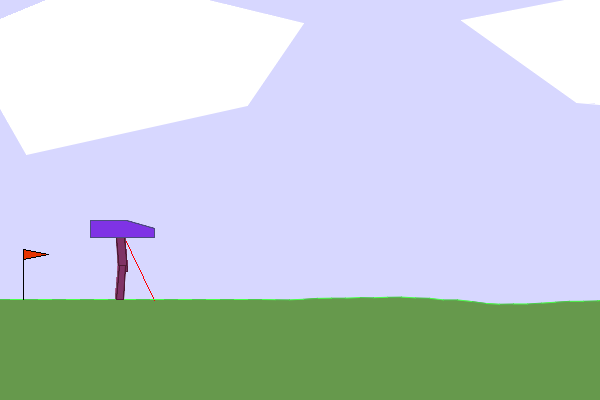

In [12]:
# Convert the numpy array to a PIL image
PIL.Image.fromarray(env.render())

# Action

In [13]:
# Display information about the action specification of the environment
print('Action Spec:')
print(env.action_spec())

Action Spec:
BoundedArraySpec(shape=(4,), dtype=dtype('float32'), name='action', minimum=-1.0, maximum=1.0)


# Observation

In [14]:
# Display information about the observation specification of the environment
print('Observation Spec:')
print(env.time_step_spec().observation)

Observation Spec:
BoundedArraySpec(shape=(24,), dtype=dtype('float32'), name='observation', minimum=-3.4028234663852886e+38, maximum=3.4028234663852886e+38)


# Rewards

In [15]:
# Display information about the reward specification of the environment
print('Reward Spec:')
print(env.time_step_spec().reward)

Reward Spec:
ArraySpec(shape=(), dtype=dtype('float32'), name='reward')


# Model

In [16]:
# Number of iterations for training
num_iterations = 100000

# Steps for initial data collection
initial_collect_steps = 10000

# Number of steps to collect data in each iteration
collect_steps_per_iteration = 1

# Capacity of the replay buffer to store experiences
replay_buffer_capacity = 10000

# Batch size for training
batch_size = 256

# Learning rates for the critic, actor, and alpha (for entropy)
critic_learning_rate = 3e-4
actor_learning_rate = 3e-4
alpha_learning_rate = 3e-4

# Rate to update the target networks
target_update_tau = 0.005
target_update_period = 1

# Discount factor for future rewards in the RL algorithm
gamma = 0.99

# Scaling factor for rewards
reward_scale_factor = 1.0

# Neural network layer sizes for the actor and critic networks
actor_fc_layer_params = (256, 256)  # Hidden layers for actor
critic_joint_fc_layer_params = (256, 256)  # Hidden layers for critic

# Interval for logging during training
log_interval = 5000

# Number of episodes used for evaluation
num_eval_episodes = 20

# Interval for evaluating the trained policy
eval_interval = 10000

# Interval for saving the policy
policy_save_interval = 5000

In [17]:
# Load the environment 'BipedalWalker-v3' for data collection using PyBullet suite
collect_env = suite_pybullet.load(env_name)

# Load the same environment 'BipedalWalker-v3' for evaluation using PyBullet suite
eval_env = suite_pybullet.load(env_name)

In [18]:
# Get the strategy for TensorFlow execution, specifying to not use TPU and to use GPU if available
strategy = strategy_utils.get_strategy(tpu=False, use_gpu=True)

In [19]:
# Retrieve specifications for observations, actions, and time steps from the environment
observation_spec, action_spec, time_step_spec = spec_utils.get_tensor_specs(collect_env)

In [20]:
# Define a critic network within the specified TensorFlow strategy scope
with strategy.scope():
    # Create a CriticNetwork instance
    critic_net = critic_network.CriticNetwork(
        (observation_spec, action_spec),  # Specifications for observations and actions
        observation_fc_layer_params=None,  # Parameters for observation fully connected layers (if any)
        action_fc_layer_params=None,  # Parameters for action fully connected layers (if any)
        joint_fc_layer_params=critic_joint_fc_layer_params,  # Parameters for joint fully connected layers
        kernel_initializer="glorot_uniform",  # Initialization method for kernel weights
        last_kernel_initializer="glorot_uniform"  # Initialization method for the last layer's kernel weights
    )

In [21]:
# Define an actor network within the specified TensorFlow strategy scope
with strategy.scope():
    # Create an ActorDistributionNetwork instance
    actor_net = actor_distribution_network.ActorDistributionNetwork(
        observation_spec,  # Specifications for observations
        action_spec,  # Specifications for actions
        fc_layer_params=actor_fc_layer_params,  # Fully connected layer parameters for the actor network
        continuous_projection_net=(
            tanh_normal_projection_network.TanhNormalProjectionNetwork
        )  # Projection network for continuous action distribution
    )

In [22]:
# Define operations within the specified TensorFlow strategy scope
with strategy.scope():
    # Create a training step function for the agent
    train_step = train_utils.create_train_step()

    # Instantiate a Soft Actor-Critic (SAC) agent
    tf_agent = sac_agent.SacAgent(
        time_step_spec,  # Specifications for time steps
        action_spec,  # Specifications for actions
        actor_network=actor_net,  # Actor network for the agent
        critic_network=critic_net,  # Critic network for the agent
        actor_optimizer=tf.keras.optimizers.Adam(learning_rate=actor_learning_rate),  # Optimizer for actor network
        critic_optimizer=tf.keras.optimizers.Adam(learning_rate=alpha_learning_rate),  # Optimizer for critic network
        alpha_optimizer=tf.keras.optimizers.Adam(learning_rate=alpha_learning_rate),  # Optimizer for alpha (entropy) adjustment
        target_update_tau=target_update_tau,  # Parameter for target network update
        target_update_period=target_update_period,  # Period for target network update
        td_errors_loss_fn=tf.math.squared_difference,  # Loss function for TD errors
        gamma=gamma,  # Discount factor
        reward_scale_factor=reward_scale_factor,  # Scaling factor for rewards
        train_step_counter=train_step  # Counter for train steps
    )

    # Initialize the SAC agent
    tf_agent.initialize()

In [23]:
# Define a table name and create a Reverb table instance
table_name = "uniform_table"
table = reverb.Table(
    table_name,
    max_size=replay_buffer_capacity,  # Maximum size of the table (replay buffer capacity)
    sampler=reverb.selectors.Uniform(),  # Selector for sampling from the table (Uniform sampling)
    remover=reverb.selectors.Fifo(),  # Selector for removing items from the table (FIFO: First-In-First-Out)
    rate_limiter=reverb.rate_limiters.MinSize(1)  # Rate limiter ensuring minimum table size for sampling
)

# Create a Reverb server with the defined table
reverb_server = reverb.Server([table])

In [24]:
# Create a ReverbReplayBuffer instance
reverb_replay = reverb_replay_buffer.ReverbReplayBuffer(
    tf_agent.collect_data_spec,  # Data specifications for the collected data by the agent
    sequence_length=2,  # Length of sequences sampled from the replay buffer
    table_name=table_name,  # Name of the Reverb table used for storing the data
    local_server=reverb_server  # Local Reverb server managing the table
)

In [25]:
# Create a dataset from the Reverb replay buffer
dataset = reverb_replay.as_dataset(
    sample_batch_size=batch_size,  # Batch size for sampling from the replay buffer
    num_steps=2  # Number of time steps in each element of the dataset
).prefetch(50)  # Prefetch 50 elements for faster data retrieval

# Define a function that returns the dataset
experience_dataset_fn = lambda: dataset

In [26]:
# Obtain the TensorFlow policy from the trained agent
tf_eval_policy = tf_agent.policy

# Create an evaluation policy using PyTFEagerPolicy
eval_policy = py_tf_eager_policy.PyTFEagerPolicy(
    tf_eval_policy,  # TensorFlow policy obtained from the agent
    use_tf_function=True  # Indicates the use of TensorFlow function for policy execution
)

In [27]:
# Obtain the TensorFlow policy for collecting experiences from the agent
tf_collect_policy = tf_agent.collect_policy

# Create a policy for collecting experiences using PyTFEagerPolicy
collect_policy = py_tf_eager_policy.PyTFEagerPolicy(
    tf_collect_policy,  # TensorFlow collect policy obtained from the agent
    use_tf_function=True  # Indicates the use of TensorFlow function for policy execution
)

In [28]:
# Create a random policy for the environment using RandomPyPolicy
random_policy = random_py_policy.RandomPyPolicy(
    collect_env.time_step_spec(),  # Specifications for time steps
    collect_env.action_spec()  # Specifications for actions
)

In [29]:
# Create an observer to add trajectories to a Reverb table
rb_observer = reverb_utils.ReverbAddTrajectoryObserver(
    reverb_replay.py_client,  # PyReverb client associated with the replay buffer
    table_name,  # Name of the Reverb table where trajectories are added
    sequence_length=2,  # Length of trajectories to be added
    stride_length=1  # Length of stride between added trajectories
)

In [30]:
# Define an actor for initial data collection
initial_collect_actor = actor.Actor(
    collect_env,  # Environment used for data collection
    random_policy,  # Random policy for the actor to take actions
    train_step,  # Train step function for the actor
    steps_per_run=initial_collect_steps,  # Number of steps to take per run (initial data collection)
    observers=[rb_observer]  # List of observers, including the Reverb trajectory observer
)

# Run the initial data collection actor
initial_collect_actor.run()

In [31]:
# Initialize a metric to track environment steps
env_step_metric = py_metrics.EnvironmentSteps()

# Create an actor for ongoing data collection
collect_actor = actor.Actor(
    collect_env,  # The environment used for data collection
    collect_policy,  # The policy employed by the actor to take actions
    train_step,  # The function representing a single step of the training process
    steps_per_run=1,  # Number of steps to take per run (ongoing data collection)
    metrics=actor.collect_metrics(10),  # Metrics for the actor (collected every 10 steps)
    summary_dir=os.path.join(tempdir, learner.TRAIN_DIR),  # Directory for storing summaries
    observers=[rb_observer, env_step_metric]  # List of observers for the actor
)

In [32]:
# Create an actor for evaluation episodes
eval_actor = actor.Actor(
    eval_env,  # The evaluation environment
    eval_policy,  # The policy used for evaluation
    train_step,  # The function representing a single step of the training process
    episodes_per_run=num_eval_episodes,  # Number of episodes to run for evaluation
    metrics=actor.eval_metrics(num_eval_episodes),  # Metrics for evaluation
    summary_dir=os.path.join(tempdir, 'eval'),  # Directory for storing evaluation summaries
)

In [33]:
# Directory to save the trained policy model
saved_model_dir = os.path.join(tempdir, learner.POLICY_SAVED_MODEL_DIR)

# List of triggers that control different actions during training
learning_triggers = [
    triggers.PolicySavedModelTrigger(
        saved_model_dir,
        tf_agent,
        train_step,
        interval=policy_save_interval  # Interval for saving the policy model
    ),
    triggers.StepPerSecondLogTrigger(train_step, interval=1000),  # Log training step per second
]

# Create a Learner responsible for training the agent
agent_learner = learner.Learner(
    tempdir,  # Temporary directory for storing intermediate training artifacts
    train_step,  # Function representing a single step of the training process
    tf_agent,  # The agent being trained
    experience_dataset_fn,  # Function returning the dataset for training
    triggers=learning_triggers,  # Triggers that control training behavior
    strategy=strategy  # The strategy for distributed training
)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tf_agents.distributions.utils.SquashToSpecNormal_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tfp.distributions.MultivariateNormalDiag_ACTTypeSpec; loading this StructuredValue will require that this type be imported and registered.
  warnings.warn("Encoding a StructuredValue with type %s; loading this "
/usr/local/lib/python3.10/dist-packages/tensorflow/python/saved_model/nested_structure_coder.py:458: UserWarning: Encoding a StructuredValue with type tf_agents.distributions.utils.SquashToSpecNormal_ACTTypeSpec; loading this StructuredValue will require that this t

In [34]:
def get_eval_metrics():
    eval_actor.run()  # Execute the evaluation actor to perform evaluation episodes
    results = {}  # Initialize an empty dictionary to store metric results
    for metric in eval_actor.metrics:  # Iterate through the metrics associated with the evaluation actor
        results[metric.name] = metric.result()  # Collect and store each metric's result in the dictionary
    return results  # Return the collected metric results as a dictionary

metrics = get_eval_metrics()  # Execute the function to gather evaluation metrics

In [35]:
def log_eval_metrics(step, metrics):
    # Joining metric names and their corresponding results into a formatted string
    eval_results = (', ').join(
        '{} = {:.6f}'.format(name, result) for name, result in metrics.items()
    )
    # Printing the formatted log message with step number and evaluation results
    print('step = {0}: {1}'.format(step, eval_results))

log_eval_metrics(0, metrics)  # Calling the function with step number 0 and the collected metrics

step = 0: AverageReturn = -108.703812, AverageEpisodeLength = 356.100006


In [ ]:
# Try-except block to potentially measure the execution time of this block, but it lacks the 'except' clause.

# Set the initial training step counter to 0 for the agent
tf_agent.train_step_counter.assign(0)

# Obtain the initial evaluation metric 'AverageReturn' and store it in 'avg_return'
avg_return = get_eval_metrics()["AverageReturn"]

# Initialize a list 'returns' with the initial average return value
returns = [avg_return]

# Loop for 'num_iterations' iterations
for _ in range(num_iterations):
    # Run the data collection actor to collect experiences
    collect_actor.run()

    # Perform a single iteration of agent learning using the agent learner
    loss_info = agent_learner.run(iterations=1)

    # Get the current training step from the agent learner
    step = agent_learner.train_step_numpy

    # Check if 'eval_interval' is set and if the current step is a multiple of 'eval_interval'
    if eval_interval and step % eval_interval == 0:
        # Obtain evaluation metrics using 'get_eval_metrics()'
        metrics = get_eval_metrics()

        # Log evaluation metrics at the current step using 'log_eval_metrics()'
        log_eval_metrics(step, metrics)

        # Append the 'AverageReturn' metric to the 'returns' list
        returns.append(metrics["AverageReturn"])

    # Check if 'log_interval' is set and if the current step is a multiple of 'log_interval'
    if log_interval and step % log_interval == 0:
        # Print the current step and the loss information
        print('step = {0}: loss = {1}'.format(step, loss_info.loss.numpy()))

# Close the Reverb observer
rb_observer.close()

# Stop the Reverb server
reverb_server.stop()

step = 5000: loss = -25.937175750732422


In [ ]:
# Define the steps for x-axis based on eval_interval
steps = range(0, num_iterations + 1, eval_interval)

# Plot the average return against steps
plt.plot(steps, returns)

# Set labels for the axes
plt.ylabel('Average Return')
plt.xlabel('Step')

# Set limits for the y-axis (you need to specify appropriate values for y-axis limits)
plt.ylim(0, max(returns) + 100)  # Example: Set the y-axis limit from 0 to the maximum return + 100

In [ ]:
import base64
import IPython.display

def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename, 'rb').read()
    b64 = base64.b64encode(video).decode()
    tag = '''
    <video width="640" height="480" controls>
        <source src="data:video/mp4;base64,{0}" type="video/mp4">
    </video>
    '''.format(b64)

    return IPython.display.HTML(tag)

In [ ]:
# Assign 'v1' as the value for the VERSION_NUMBER variable
VERSION_NUMBER = 'v1'

In [ ]:
# Set the number of episodes to run for video generation
num_episodes = 3

# Define the video filename based on the VERSION_NUMBER variable
video_filename = f'bipedal_walker_normal_{VERSION_NUMBER}.mp4'

# Create the video using imageio to capture frames from the environment rendering
with imageio.get_writer(video_filename, fps=60) as video:
    # Loop through the specified number of episodes
    for _ in range(num_episodes):
        # Reset the environment for each episode and capture the initial rendering
        time_step = eval_env.reset()
        video.append_data(eval_env.render())

        # Loop within an episode until it ends
        while not time_step.is_last():
            # Get the action from the evaluation actor's policy
            action_step = eval_actor.policy.action(time_step)

            # Take a step in the environment based on the selected action
            time_step = eval_env.step(action_step.action)

            # Capture the rendering after the step
            video.append_data(eval_env.render())

# Embed the generated video in the notebook using the 'embed_mp4()' function
embed_mp4(video_filename)